In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd



In [2]:
df = pd.read_csv("All_player_with_score.csv")

In [3]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [4]:
df['position'].unique()


array(['Attacking Midfield', 'Central Midfield', 'Left Midfield',
       'Right Midfield', 'Centre-Forward', 'Right Winger',
       'Second Striker', 'Left Winger', 'Left-Back', 'Defensive Midfield',
       'Centre-Back', 'Right-Back', 'Goalkeeper'], dtype=object)

In [5]:
df.replace(['Attacking Midfield', 'Central Midfield', 'Left Midfield','Right Midfield','Defensive Midfield','Defensive Midfield'], 'Midfiedld' ,inplace=True)
df.replace(['Centre-Forward', 'Right Winger','Second Striker', 'Left Winger'], 'Attack' ,inplace=True)
df.replace(['Left-Back', 'Centre-Back', 'Right-Back'], 'Defensive' ,inplace=True)


In [6]:
df['position'].unique()

array(['Midfiedld', 'Attack', 'Defensive', 'Goalkeeper'], dtype=object)

In [7]:
df

,season_id,player_id,goals,assists,ppg,yellow_cards,second_yellow_cards,red_cards,player_name,date_of_birth,height,foot,position,age,mk_value,agent,apprance,score,goals_conceded,clean_sheets
0,2019,88755,31.707317,90.909091,74.333333,38.709677,18.75,0.0,Kevin De Bruyne,28-Jun-91,1.81,right,Midfiedld,24.0,60000000.0,0,97.222222,100.0,NaN,NaN
1,2019,88755,31.707317,90.909091,74.333333,38.709677,18.75,0.0,Kevin De Bruyne,28-Jun-91,1.81,right,Midfiedld,27.0,130000000.0,0,97.222222,100.0,NaN,NaN
2,2019,88755,31.707317,90.909091,74.333333,38.709677,18.75,0.0,Kevin De Bruyne,28-Jun-91,1.81,right,Midfiedld,30.0,85000000.0,0,97.222222,100.0,NaN,NaN
3,2019,88755,31.707317,90.909091,74.333333,38.709677,18.75,0.0,Kevin De Bruyne,28-Jun-91,1.81,right,Midfiedld,29.0,100000000.0,0,97.222222,100.0,NaN,NaN
4,2019,88755,31.707317,90.909091,74.333333,38.709677,18.75,0.0,Kevin De Bruyne,28-Jun-91,1.81,right,Midfiedld,29.0,100000000.0,0,97.222222,100.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80284,2019,22318,NaN,NaN,0.000000,0.000000,0.00,100.0,Federico Marchetti,7-Feb-83,1.88,left,Goalkeeper,32.0,4000000.0,Gea World,0.000000,0.0,0.0,0.0
80285,2019,22318,NaN,NaN,0.000000,0.000000,0.00,100.0,Federico Marchetti,7-Feb-83,1.88,left,Goalkeeper,33.0,2000000.0,Gea World,0.000000,0.0,0.0,0.0
80286,2019,22318,NaN,NaN,0.000000,0.000000,0.00,100.0,Federico Marchetti,7-Feb-83,1.88,left,Goalkeeper,34.0,800000.0,Gea World,0.000000,0.0,0.0,0.0
80287,2019,22318,NaN,NaN,0.000000,0.000000,0.00,100.0,Federico Marchetti,7-Feb-83,1.88,left,Goalkeeper,37.0,200000.0,Gea World,0.000000,0.0,0.0,0.0


In [8]:
df.fillna(0 ,inplace=True)
df.drop('date_of_birth', axis=1 , inplace=True)

In [9]:
df = df.drop_duplicates(['player_name']).reset_index()

In [10]:
df.drop(['agent', 'foot','season_id','index','player_id','mk_value','ppg'], axis=1 , inplace=True)

In [11]:
df

,goals,assists,yellow_cards,second_yellow_cards,red_cards,player_name,height,position,age,apprance,score,goals_conceded,clean_sheets
0,31.707317,90.909091,38.709677,18.75,0.0,Kevin De Bruyne,1.81,Midfiedld,24.0,97.222222,100.000000,0.000000,0.0
1,21.951220,72.727273,35.483871,12.50,0.0,Marco Reus,1.80,Midfiedld,26.0,100.000000,90.808163,0.000000,0.0
2,14.634146,72.727273,32.258065,31.25,0.0,Luis Alberto,1.83,Midfiedld,25.0,100.000000,87.857190,0.000000,0.0
3,39.024390,63.636364,22.580645,31.25,50.0,Bruno Fernandes,1.79,Midfiedld,24.0,100.000000,86.105966,0.000000,0.0
4,17.073171,63.636364,32.258065,0.00,0.0,Julian Brandt,1.85,Midfiedld,25.0,97.058824,83.221953,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,0.000000,0.000000,0.000000,0.00,0.0,Jonas Hupe,2.00,Goalkeeper,19.0,0.000000,7.612532,0.000000,0.0
6530,0.000000,0.000000,0.000000,0.00,0.0,Vincenzo Fiorillo,1.90,Goalkeeper,31.0,5.000000,7.311377,5.494505,0.0
6531,0.000000,0.000000,0.000000,0.00,0.0,Moritz Nicolas,1.93,Goalkeeper,19.0,3.125000,6.838731,4.395604,0.0
6532,0.000000,0.000000,0.000000,0.00,0.0,Nereo Champagne,1.88,Goalkeeper,32.0,5.263158,6.802407,6.593407,0.0


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder().fit(df['position'])
df['position'] =  encoder.transform(df['position'])





In [13]:
df.drop('player_name' , axis=1 , inplace=True)

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop('position' , axis=1)
y = df['position']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test =  ss.transform(X_test)

In [16]:
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5 , verbose=True)
# grid_search.fit(X_train,y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [17]:
from sklearn.metrics import classification_report

rf_best = RandomForestClassifier(max_depth=None , min_samples_split= 10 , n_estimators=300).fit(X_train,y_train)

y_pred = rf_best.predict(X_test)

print("accuracy score = ",accuracy_score( y_pred,y_test))

0.7605202754399388


In [24]:
print("classification report\n\n", classification_report(y_pred , y_test))

classification report

               precision    recall  f1-score   support

           0       0.77      0.69      0.73       360
           1       0.91      0.81      0.86       503
           2       1.00      1.00      1.00       154
           3       0.48      0.63      0.55       290

    accuracy                           0.76      1307
   macro avg       0.79      0.78      0.78      1307
weighted avg       0.79      0.76      0.77      1307



In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='score', y='apprance', hue='position')
plt.figure(figsize=(28, 6))

In [302]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# sv = SVC(max_iter=1000000)

# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# grid_search = GridSearchCV(estimator=sv, param_grid=param_grid, cv=5 , verbose=True)
# grid_search.fit(X_train,y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [304]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# lr = LogisticRegression(max_iter=100000)


# param_grid = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }

# grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5 , verbose=True)
# grid_search.fit(X_train,y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

<Figure size 2800x600 with 0 Axes>

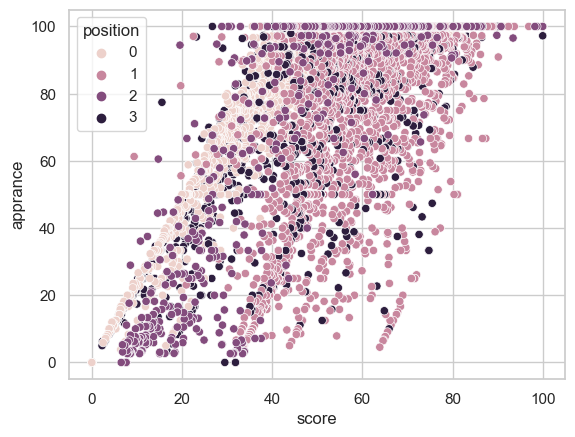

<Figure size 2800x600 with 0 Axes>

<Figure size 2016x432 with 0 Axes>

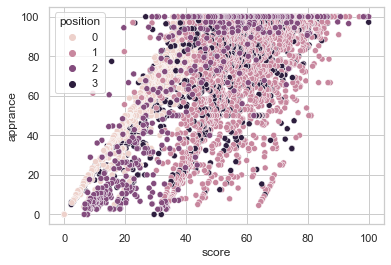

<Figure size 2016x432 with 0 Axes>

In [320]:
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='score', y='apprance', hue='position')
plt.figure(figsize=(28, 6))